# Boston Police Department Crime Incidents' Analysis

Data source:
https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

## Introduction

As the title leaks, we will be dealing with data from Boston's police department. The data keeps track of several information related to crime incidents during the period from year 2015 to 2019 (current date). The description given on the website is: "Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond." 

Our target is to answer the following questions:

1) Which districts highlights the highest number of incidents? Streets?

2) What are the most comitted crimes? According to each district?

3) How did the most 3 comitted crimes change during the years?

4) Which day hosted the highest number of crimes for each of the four years? Month? What hour of the day?

## Importing the data and getting familiar

Let's first import our data, which is in .CSV format (comma separated values: data are in rows that have their individual values separated with commas), as a Pandas DataFrame object, which is also a tabular form(rows and columns intersecting and defining unique cells) but easier to deal with than the .csv for data analysis purposes. We will also print a few lines from the begining and ending of our data to get more familiar with it.

In [54]:
import pandas as pd

# reading in the .csv file which is located in the same file as our ipython notebook
data = pd.read_csv('data.csv')

# printing out the first five rows
data.head()



# data[data.SHOOTING == 'Y'].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192057955,3115,Investigate Person,INVESTIGATE PERSON,D4,627,NaN,2019-07-26 19:56:00,2019,7,Friday,19,Part Three,KILMARNOCK ST,42.343535,-71.099801,"(42.34353469, -71.09980109)"
1,I192057953,619,Larceny,LARCENY ALL OTHERS,B3,434,NaN,2019-07-26 21:00:00,2019,7,Friday,21,Part One,EVANS ST,42.282293,-71.080889,"(42.28229312, -71.08088944)"
2,I192057944,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E13,574,NaN,2019-07-26 20:48:00,2019,7,Friday,20,Part Three,WASHINGTON ST,42.309719,-71.104294,"(42.30971857, -71.10429432)"
3,I192057942,619,Larceny,LARCENY ALL OTHERS,D14,800,NaN,2019-07-26 19:00:00,2019,7,Friday,19,Part One,ASHFORD ST,42.354319,-71.129017,"(42.35431862, -71.12901674)"
4,I192057939,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,166,NaN,2019-07-26 15:00:00,2019,7,Friday,15,Part Two,SHAWMUT AVE,42.341775,-71.071245,"(42.34177501, -71.07124466)"


In [55]:
# printing out the last five rows
data.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
407042,I020691165-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
407043,I020674147-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
407044,I020669075-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:00:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
407045,I020662996-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,2019-05-23 08:56:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
407046,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407047 entries, 0 to 407046
Data columns (total 17 columns):
INCIDENT_NUMBER        407047 non-null object
OFFENSE_CODE           407047 non-null int64
OFFENSE_CODE_GROUP     407047 non-null object
OFFENSE_DESCRIPTION    407047 non-null object
DISTRICT               404938 non-null object
REPORTING_AREA         407047 non-null object
SHOOTING               1660 non-null object
OCCURRED_ON_DATE       407047 non-null object
YEAR                   407047 non-null int64
MONTH                  407047 non-null int64
DAY_OF_WEEK            407047 non-null object
HOUR                   407047 non-null int64
UCR_PART               406939 non-null object
STREET                 394996 non-null object
Lat                    381354 non-null float64
Long                   381354 non-null float64
Location               407047 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 52.8+ MB


## Cleaning the data

Before we start doing any analysis or asking questions, we should make sure our data is the way we like. This will be done by removing extra columns and rows that may be unneeded, affect our analysis later on, or slow us down by taking extra memory for no much extra help.

### Removing redundant columns

With a first glimpse, we can find out that some fields(columns) are redundant and add no value to the data. 'Lat' and 'Long' (corresponding to latitude and longitude respectively) are an example of such columns, since we already have the 'Location' column which is just the 'Lat' and 'Long' put together, and has no null objects (rows with no information) in contrast. We also find that 'OFFENSE_CODE_GROUP' and 'OFFENSE_DESCRIPTION' refer almost to the same information, so let's keep the first('OFFENSE_CODE_GROUP') which seems to have shorter text and goes to the point. Moreover, if we need more information such as the one in the 'OFFENSE_DESCRIPTION', we just need to look it up using the 'offense_code' and we'll find the exact information in the offense codes' separate file. 'Reporting Area', which shows a code corresponding to where the report was made, and 'Incident Number', which contains a unique internal code for each incident within the Boston PD, are also unneeded columns since they are irrelevant to our analysis. Lastly, the 'SHOOTING' column seems to have a very high number of unknown values, so removing the whole column would do more good than harm. Let's first get rid of these columns and then continue dealing with the rest.

In [57]:
# axis parameter should be 1 (columns' axis) to define where the drop takes place; the default value is 0
data = data.drop(['Lat','Long','OFFENSE_DESCRIPTION',
                  'REPORTING_AREA', 'SHOOTING','UCR_PART'], axis=1)
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Location
0,I192057955,3115,Investigate Person,D4,2019-07-26 19:56:00,2019,7,Friday,19,KILMARNOCK ST,"(42.34353469, -71.09980109)"
1,I192057953,619,Larceny,B3,2019-07-26 21:00:00,2019,7,Friday,21,EVANS ST,"(42.28229312, -71.08088944)"
2,I192057944,3006,Medical Assistance,E13,2019-07-26 20:48:00,2019,7,Friday,20,WASHINGTON ST,"(42.30971857, -71.10429432)"
3,I192057942,619,Larceny,D14,2019-07-26 19:00:00,2019,7,Friday,19,ASHFORD ST,"(42.35431862, -71.12901674)"
4,I192057939,1102,Fraud,D4,2019-07-26 15:00:00,2019,7,Friday,15,SHAWMUT AVE,"(42.34177501, -71.07124466)"


### Creating needed columns from available ones

Since we have the YEAR, MONTH, DAY_OF_WEEK, and HOUR columns, OCCURED_ON_DATE is unneeded. But, before that, let's retrieve the day of the month and put it in a separate columns since its the only information that can only be found in the OCCURED_ON_DATE column.

In [58]:
import datetime

# convert the str into datetime object then extracting using 'day' method
data['DAY'] = data['OCCURRED_ON_DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').day)

# removing 'OCCURRED_ON_DATE' since it is no more needed
data = data.drop(['OCCURRED_ON_DATE'],axis=1)

data.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Location,DAY
407042,I020691165-00,3125,Warrant Arrests,A1,2019,5,Thursday,8,NEW SUDBURY ST,"(42.36183857, -71.05976489)",23
407043,I020674147-00,3125,Warrant Arrests,A1,2019,5,Thursday,8,NEW SUDBURY ST,"(42.36183857, -71.05976489)",23
407044,I020669075-00,3125,Warrant Arrests,A1,2019,5,Thursday,8,NEW SUDBURY ST,"(42.36183857, -71.05976489)",23
407045,I020662996-00,3125,Warrant Arrests,A1,2019,5,Thursday,8,NEW SUDBURY ST,"(42.36183857, -71.05976489)",23
407046,I010370257-00,3125,Warrant Arrests,E13,2016,5,Tuesday,19,NEW WASHINGTON ST,"(42.30233307, -71.11156487)",31


It definitely looks like we have a lot of date and time columns. But, we will keep it for now since it is essential to most of our questions. We will rearrange our columns next to a more convenient order.

In [59]:
# Getting the columns' names and converting to list
cols = data.columns.values.tolist()
cols

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'DISTRICT',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'STREET',
 'Location',
 'DAY']

In [60]:
# new preferred order of columns
new_cols = ['INCIDENT_NUMBER','OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'DAY',
 'DAY_OF_WEEK',
 'MONTH',
 'YEAR',
 'HOUR',
 'STREET',            
 'DISTRICT',
 'Location']

# reassigning new order to our data
data = data[new_cols]
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,DAY,DAY_OF_WEEK,MONTH,YEAR,HOUR,STREET,DISTRICT,Location
0,I192057955,3115,Investigate Person,26,Friday,7,2019,19,KILMARNOCK ST,D4,"(42.34353469, -71.09980109)"
1,I192057953,619,Larceny,26,Friday,7,2019,21,EVANS ST,B3,"(42.28229312, -71.08088944)"
2,I192057944,3006,Medical Assistance,26,Friday,7,2019,20,WASHINGTON ST,E13,"(42.30971857, -71.10429432)"
3,I192057942,619,Larceny,26,Friday,7,2019,19,ASHFORD ST,D14,"(42.35431862, -71.12901674)"
4,I192057939,1102,Fraud,26,Friday,7,2019,15,SHAWMUT AVE,D4,"(42.34177501, -71.07124466)"


### Rows lacking information

Next, we will remove rows contain missing values. 

In [61]:
# we don't need to specify the axis since the default is 0(row-wise)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394149 entries, 0 to 407046
Data columns (total 11 columns):
INCIDENT_NUMBER       394149 non-null object
OFFENSE_CODE          394149 non-null int64
OFFENSE_CODE_GROUP    394149 non-null object
DAY                   394149 non-null int64
DAY_OF_WEEK           394149 non-null object
MONTH                 394149 non-null int64
YEAR                  394149 non-null int64
HOUR                  394149 non-null int64
STREET                394149 non-null object
DISTRICT              394149 non-null object
Location              394149 non-null object
dtypes: int64(5), object(6)
memory usage: 36.1+ MB


## Question 1: Which districts and streets highlight the highest number of incidents?

To tackle this problem, we will first need to have a lower level digging to find out the number of unique districts and streets.

In [62]:
# subset of the columns we need for this analysis
dist_st_cols = ['INCIDENT_NUMBER','OFFENSE_CODE_GROUP','STREET','DISTRICT']
data_areas = data[dist_st_cols]
data_areas.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,STREET,DISTRICT
0,I192057955,Investigate Person,KILMARNOCK ST,D4
1,I192057953,Larceny,EVANS ST,B3
2,I192057944,Medical Assistance,WASHINGTON ST,E13
3,I192057942,Larceny,ASHFORD ST,D14
4,I192057939,Fraud,SHAWMUT AVE,D4


In [63]:
#incident counts by districts in descending order
data_areas.DISTRICT.value_counts().sort_values(ascending=False)

B2     63146
C11    53125
D4     50583
B3     45236
A1     43705
C6     28479
D14    25040
E18    21981
E13    21638
E5     17041
A7     16089
A15     8086
Name: DISTRICT, dtype: int64

The three districts with the highest incidents are: 

B2     63146

C11    53125

D4     50583

In [64]:
#incident counts by streets in descending order
data_areas.STREET.value_counts().sort_values(ascending=False)

WASHINGTON ST          18457
BLUE HILL AVE          10081
BOYLSTON ST             9126
DORCHESTER AVE          6437
TREMONT ST              6278
MASSACHUSETTS AVE       6055
HARRISON AVE            6022
CENTRE ST               5636
COMMONWEALTH AVE        5291
HYDE PARK AVE           4531
COLUMBIA RD             4066
HUNTINGTON AVE          3814
RIVER ST                3689
DUDLEY ST               3150
COLUMBUS AVE            3003
WARREN ST               2927
ADAMS ST                2613
BEACON ST               2474
NEWBURY ST              2456
BOWDOIN ST              2197
CAMBRIDGE ST            2191
AMERICAN LEGION HWY     2104
GENEVA AVE              2036
W BROADWAY              2015
ALBANY ST               1925
ALLSTATE RD             1675
SUMMER ST               1647
NEW SUDBURY ST          1586
BORDER ST               1550
HANCOCK ST              1539
                       ...  
S HAMPTON ST               1
ROLLINS PL                 1
KENNEBEC AVE               1
CRYSTAL PL    

We can clearly see that the 3 streets with most incidents are : 

WASHINGTON ST                18457

BLUE HILL AVE                10081

BOYLSTON ST                   9126

Let's also find out the districts these streets cover.

In [65]:
street_1 = len(data_areas[data_areas['STREET'] == 'WASHINGTON ST']['DISTRICT'].value_counts())
street_2 = len(data_areas[data_areas['STREET'] == 'BLUE HILL AVE']['DISTRICT'].value_counts())
street_3 = len(data_areas[data_areas['STREET'] == 'BOYLSTON ST']['DISTRICT'].value_counts())
street_1,street_2,street_3

(11, 4, 10)

It looks like the first street (WASHINGTON ST ) and third street (BOYLSTON ST) are main streets that cover a lot of geopgraphical area. The second covers a way smaller area (relatively only four districts) but hosts a lot of incidents. Let's dig in more into this street.

In [66]:
st2_data = data_areas[data_areas['STREET'] == 'BLUE HILL AVE']['OFFENSE_CODE_GROUP']
st2_data.value_counts().sort_values(ascending=False)

Motor Vehicle Accident Response     1637
Drug Violation                      1033
Larceny                              686
Investigate Person                   637
Medical Assistance                   520
Other                                514
Simple Assault                       481
Violations                           386
Verbal Disputes                      375
Aggravated Assault                   358
Vandalism                            357
Property Lost                        331
Warrant Arrests                      285
Investigate Property                 272
Robbery                              245
Larceny From Motor Vehicle           185
Fraud                                131
Auto Theft                           118
Property Found                       109
Liquor Violation                     108
Search Warrants                       98
Firearm Violations                    93
Commercial Burglary                   93
Police Service Incidents              93
Towed           

'Motor Vehicle Accident Response' and 'Drug Violation'are the highest two crimes on this street. By doing a bit of research, we find that the very reason for all of this is the big number of liquor stores on the street, provided that drug or liquor and accidents are closely related.

## Question 2: What are the most comitted crimes? According to each district?

### Crimes with the highest number of incidents

In [67]:
crime_order = data.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=False)
crime_order.head(20)

Motor Vehicle Accident Response    43650
Larceny                            32657
Medical Assistance                 30389
Investigate Person                 23477
Other                              22239
Simple Assault                     19795
Drug Violation                     19764
Vandalism                          18869
Verbal Disputes                    16855
Investigate Property               14106
Towed                              13898
Larceny From Motor Vehicle         12968
Property Lost                      12558
Warrant Arrests                    10086
Aggravated Assault                  9759
Fraud                               7749
Violations                          7004
Missing Person Located              6817
Residential Burglary                6601
Auto Theft                          5696
Name: OFFENSE_CODE_GROUP, dtype: int64

In [68]:
data.DISTRICT.describe()

count     394149
unique        12
top           B2
freq       63146
Name: DISTRICT, dtype: object

In [69]:
data.STREET.describe()

count            394149
unique             4480
top       WASHINGTON ST
freq              18457
Name: STREET, dtype: object

Because we have a lot of streets (4480 unique streets) in comparison with only 12 districts, it will be an unintuitive approach to group by districts and streets. Instead, let's take a subset of the data. We will choose rows where the streets have at least 5000 incident reports over the four years our data covers.

In [70]:
# boolean mask to filter streets with more than 5000 incidents
more_than_5000 = data_areas.STREET.value_counts().values > 5000

high_incid_st = data_areas.STREET.value_counts()[more_than_5000]

high_num_of_incidents =  data_areas[data_areas['STREET'].isin(high_incid_st.index)]

high_num_of_incidents.info()
print(high_incid_st)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73383 entries, 2 to 407036
Data columns (total 4 columns):
INCIDENT_NUMBER       73383 non-null object
OFFENSE_CODE_GROUP    73383 non-null object
STREET                73383 non-null object
DISTRICT              73383 non-null object
dtypes: object(4)
memory usage: 2.8+ MB
WASHINGTON ST        18457
BLUE HILL AVE        10081
BOYLSTON ST           9126
DORCHESTER AVE        6437
TREMONT ST            6278
MASSACHUSETTS AVE     6055
HARRISON AVE          6022
CENTRE ST             5636
COMMONWEALTH AVE      5291
Name: STREET, dtype: int64


### Grouping the data according to districts and streets

Now we are down to only 73383 rows compared to the enormous number of 394149 from before. We are also down to only 9 streets. It will be easier to group the districts with the remaining streets now.

In [71]:
# group by streets and districts; first make sure the dataframe index isn't a multiindex
data_areas.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            407037, 407038, 407039, 407040, 407041, 407042, 407043, 407044,
            407045, 407046],
           dtype='int64', length=394149)

In [72]:
# change the index from a single column to two different columns
data_areas_multi = high_num_of_incidents.set_index(['DISTRICT','STREET']).sort_index()
data_areas_multi.head()

INCIDENT_NUMBER          OFFENSE_CODE_GROUP
DISTRICT STREET                                                 
A1       BOYLSTON ST      I192057373                       Towed
         BOYLSTON ST      I192057154                     Larceny
         BOYLSTON ST      I192057089          Medical Assistance
         BOYLSTON ST      I192056358                     Larceny
         BOYLSTON ST      I192056317  Larceny From Motor Vehicle

As we have seen, our data is now grouped by the districts and streets where each district acting as the first index has its streets and incidents listed in order. 

## Question 3: How did the most comitted crimes change during the years?

To answer this question, let's first recall our 3 winners from our past question.

    Motor Vehicle Accident Response    43650

    Larceny                            32657

    Medical Assistance                 686

The great difference in number of occurences between the first 2 and the third (i.e. and the rest of crimes) is overwhelming. Thus, let's only focus on the first 2, and see how they changed through the years.

In [73]:
# Back to our original cleaned dataframe called 'data'
# first lets find out the 'YEAR' data type before doing any analysis on it to avoid errors
data.YEAR.dtype

dtype('int64')

In [74]:
# extracting data acoording to year of occurence
data_2015 = data[data['YEAR'] == 2015]

data_2016 = data[data['YEAR'] == 2016]

data_2017 = data[data['YEAR'] == 2017]

data_2018 = data[data['YEAR'] == 2018]

data_2019 = data[data['YEAR'] == 2019]

data_2015['YEAR'].unique()

array([2015])

Now to observe the changes during the years for the two highest occuring crimes, the best way would be a simple line plot.

In [77]:
import matplotlib.pyplot as plt

%matplotlib inline


years_df = [data_2015,data_2016,data_2017,data_2018,data_2019]


# lists of each year's number of occurences for crime 1 and 2 respectively
crime_1 = []
crime_2 = []
for year in years_df:
   
    crime__1 = (year['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response').sum()
    crime_1.append(crime__1)
    
    crime__2 = (year['OFFENSE_CODE_GROUP'] == 'Larceny').sum()
    crime_2.append(crime__2)

crime_1,crime_2

([5429, 9701, 11240, 11179, 6101], [4994, 7741, 7742, 8032, 4148])

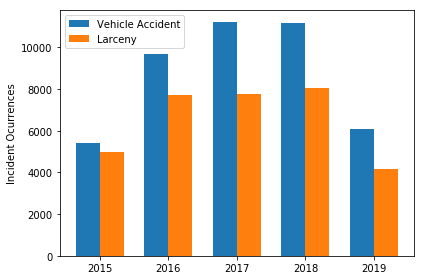

In [80]:
import numpy as np

years = ['2015','2016','2017','2018','2019']

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, crime_1, width, label='Vehicle Accident')
rects2 = ax.bar(x + width/2, crime_2, width, label='Larceny')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Incident Ocurrences')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
fig.tight_layout()


plt.show()

In [83]:
#comparing the length of data for each year to avoid inconsistency
for year,year_data in zip(years,years_df):
    print('Length of', year,'data',' : ',len(year_data))

Length of 2015 data  :  52234
Length of 2016 data  :  93566
Length of 2017 data  :  98401
Length of 2018 data  :  96820
Length of 2019 data  :  53128


looking at our plot, the first thing that catches the eye are the short bars for 2015 and 2019. By checking the amount of data collected for these two years, we find the big difference in numbers of entries (almost half) between the other 3 years and these 2 years, and thus the reason for this inconsistency. By checking the data source, we find that it says the following:

    "Records in the new system begin in June of 2015"

So we are only dealing with roughly half of the actual data. The same goes for 2019 since we are still at the end of July 2019 at the time of writing. This makes things clearer.

Back to analyzing our plot, we find that it is hard to judge on anything with just two crime types and only 3 years of entries in a bar plot. But, if we were to claim at least a single insight, then this would be the sudden increase in vehicle accidents from 2016 to 2017 against a constant rate of larceny across the three years.